In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import integrate
from scipy import ndimage
from math import erf
plt.style.use('cashaback_dark')
from tqdm import tqdm

from scipy.special import erf

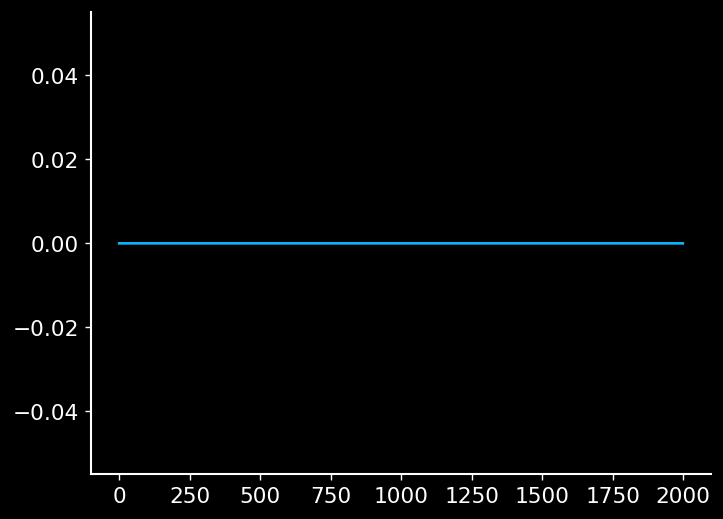

In [3]:
cutoff_time,cutoff_sd = 1000,100
agent_mean,agent_sd = 1000,200
timesteps = np.arange(0,2000,1)
agent_pdf = stats.norm.pdf(timesteps,agent_mean,agent_sd)
timing_pdf = stats.norm.pdf(timesteps,cutoff_time,cutoff_sd)
indicator_func = np.array([1 if x<cutoff_time else 0 for x in timesteps])
indicator_func_smooth = ndimage.gaussian_filter(indicator_func,sigma= 100,truncate=100,mode ='nearest')
# indicator_func_smooth = np.convolve(indicator_func,timing_pdf,mode='same')

agent_hardcut = agent_pdf*indicator_func_smooth/(agent_pdf+indicator_func_smooth)
agent_hardcut_cdf = np.cumsum(agent_hardcut)
fig,ax = plt.subplots()
# ax.plot(indicator_func_smooth)
ax.plot(agent_hardcut)
# ax.plot(agent_hardcut_cdf)

Try using a sigmoid for the step function 
- This is just the friggin CDF across time that the agent is less than the timing
- Need the prob that T>t and prob that A < t for every timestep
- Then multiply those two together (Both have to happen)
- Then convolve that cdf with agent pdf to get new agent pdf???

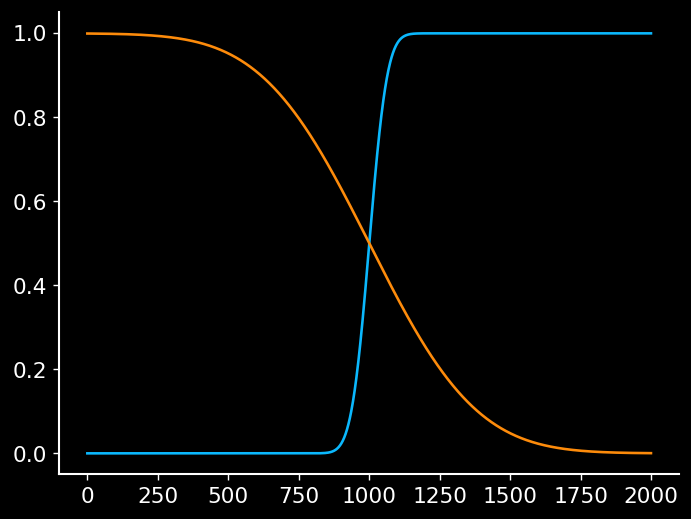

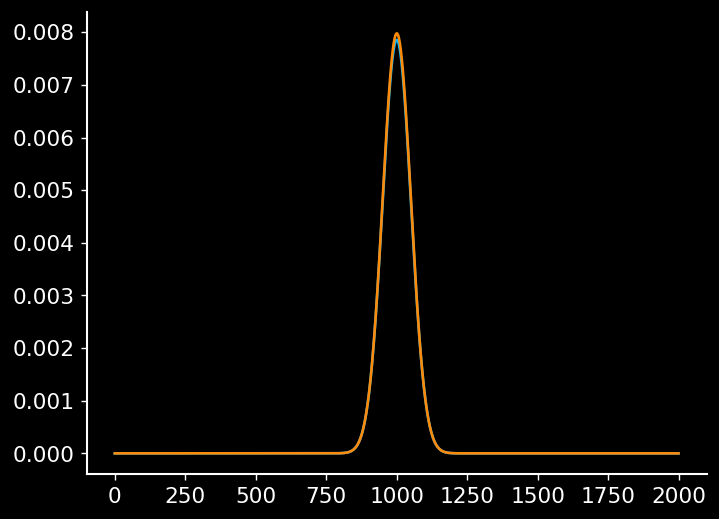

In [4]:
cutoff_time,cutoff_sd = 1000,300
agent_mean,agent_sd = 1000,50
timesteps = np.arange(0,2000,1)
agent_pdf = stats.norm.pdf(timesteps,agent_mean,agent_sd)
timing_pdf = stats.norm.pdf(timesteps,cutoff_time,cutoff_sd)

prob_agent_gone = stats.norm.cdf(timesteps,agent_mean,agent_sd)
prob_T_greater_t = 1 - stats.norm.cdf(timesteps,cutoff_time,cutoff_sd)

agent_gone_and_T_greater = prob_agent_gone*prob_T_greater_t

conv = np.convolve(agent_pdf,prob_T_greater_t,mode='same') # THIS IS THE UNCERTAIN INDICATOR FUNCTION

mult = conv*agent_pdf/(conv+agent_pdf)


fig,ax = plt.subplots()
ax.plot(prob_agent_gone)
ax.plot(prob_T_greater_t)

fig,ax = plt.subplots()
# ax.plot(conv)
ax.plot(mult)
ax.plot(agent_pdf)

Hardcutoff using expectation of new distribution 

(array([0.0041784, 0.0002768, 0.0002122, 0.0001812, 0.0001592, 0.0001655,
        0.0001852, 0.000214 , 0.0002755, 0.004152 ]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

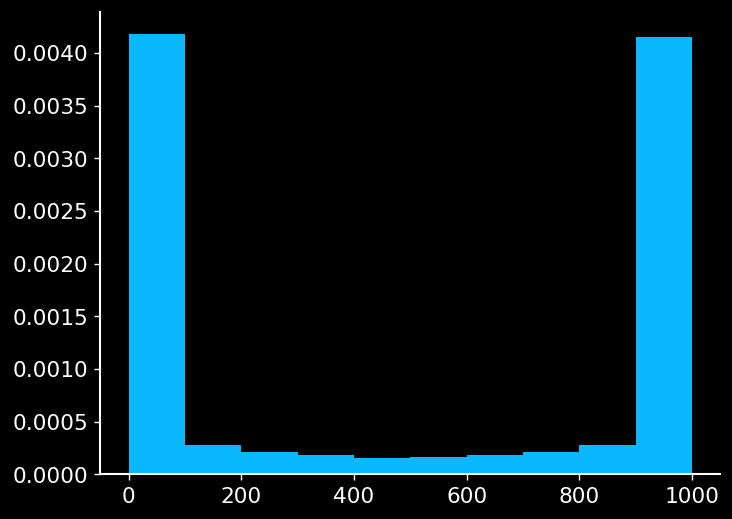

In [5]:
cutoff_time,cutoff_sd = 1000,300
agent_mean,agent_sd = 1000,50
timesteps = np.arange(0,2000,1)
agent_pdf = stats.norm.pdf(timesteps,agent_mean,agent_sd)
timing_pdf = stats.norm.pdf(timesteps,cutoff_time,cutoff_sd)
expected_value_new = np.zeros(100000)
for i in range(100000):
    cut_time = int(stats.norm.rvs(cutoff_time,cutoff_sd))
    expected_value_new[i] = np.sum(timesteps[:cut_time]*agent_pdf[:cut_time])

plt.hist(expected_value_new,density=True)

In [6]:
np.mean(expected_value_new)

498.6983195903932

In [7]:
ev = np.sum(timesteps*agent_pdf)
ev

1000.0

In [8]:
timesteps = np.arange(0,2000,1)
cutoff_time,cutoff_sd = 1100,1
agent_mean,agent_sd = 1200,50
timesteps = np.arange(0,2000,1)
agent_pdf = stats.norm.pdf(timesteps,agent_mean,agent_sd)
agent_cdf = stats.norm.cdf(timesteps,agent_mean,agent_sd)
timing_pdf = stats.norm.pdf(timesteps,cutoff_time,cutoff_sd)
prob_greater_than_agent = 1-stats.norm.cdf(0,cutoff_time-agent_mean,np.sqrt(cutoff_sd**2+agent_sd**2))
ev_new = np.sum(timesteps[:cutoff_time]*agent_pdf[:cutoff_time])/(prob_greater_than_agent)
prob_greater_than_agent

0.02277173049312764

In [9]:
a, b = (0 - agent_mean)/agent_sd, (cutoff_time - agent_mean) / agent_sd

stats.truncnorm.stats(a,b,agent_mean,agent_sd,moments='mvsk')

(array(1081.33922336),
 array(285.69775104),
 array(-1.53643217),
 array(3.01859578))

In [10]:
ev_new

1054.410804591609

In [11]:
np.sum(np.cumsum(timesteps*agent_pdf)*stats.norm.cdf(timesteps,cutoff_time,cutoff_sd))

957034.427584549